In [1]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels)= tf.keras.datasets.imdb.load_data(num_words=1000)

print(train_data[0])
print(train_data.shape)


[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000,)


In [3]:
# 원-핫 이코딩으로 변환
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences),dimension))
    for i, word_inddex in enumerate(sequences):
        results[i, word_inddex] = 1.
    return results 

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

In [4]:
# 입력 레이어 정의
inputs = tf.keras.Input(shape=(1000,))  # 입력 데이터의 특성 수

# Dense 레이어 체인
x = tf.keras.layers.Dense(16, activation='relu')(inputs)  # 첫 번째 Dense 레이어
x = tf.keras.layers.Dense(16, activation='relu')(x)       # 두 번째 Dense 레이어

# 출력 레이어
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 생성
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 16)                16016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data,test_labels),
                    verbose=2)

Epoch 1/20


2024-05-13 11:05:42.767377: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


49/49 - 1s - loss: 0.5514 - accuracy: 0.7264 - val_loss: 0.4133 - val_accuracy: 0.8262 - 554ms/epoch - 11ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3592 - accuracy: 0.8489 - val_loss: 0.3435 - val_accuracy: 0.8553 - 129ms/epoch - 3ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3195 - accuracy: 0.8675 - val_loss: 0.3330 - val_accuracy: 0.8584 - 126ms/epoch - 3ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3058 - accuracy: 0.8744 - val_loss: 0.3315 - val_accuracy: 0.8587 - 128ms/epoch - 3ms/step
Epoch 5/20
49/49 - 0s - loss: 0.2989 - accuracy: 0.8778 - val_loss: 0.3297 - val_accuracy: 0.8606 - 127ms/epoch - 3ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2936 - accuracy: 0.8788 - val_loss: 0.3375 - val_accuracy: 0.8571 - 130ms/epoch - 3ms/step
Epoch 7/20
49/49 - 0s - loss: 0.2875 - accuracy: 0.8828 - val_loss: 0.3426 - val_accuracy: 0.8554 - 144ms/epoch - 3ms/step
Epoch 8/20
49/49 - 0s - loss: 0.2820 - accuracy: 0.8844 - val_loss: 0.3322 - val_accuracy: 0.8582 - 140ms/epoch - 3ms/step
Epoch 9/20
49/49 - 0s - lo

### 드롭아웃 미적용

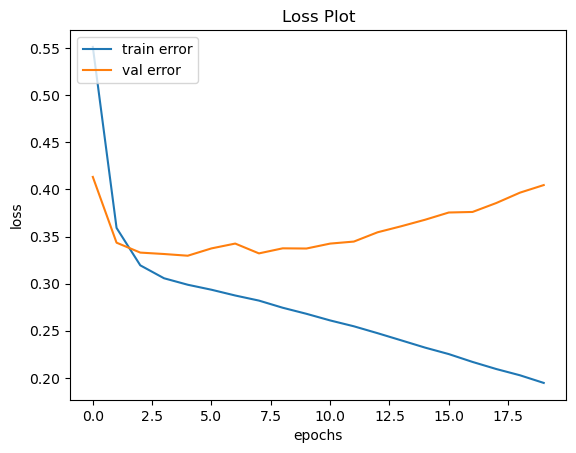

In [6]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']  # 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']  # 검증 데이터 손실값
acc = history_dict['accuracy']      # 정확도
epochs = range(1, len(acc) + 1)     # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

### 드롭아웃 적용

In [7]:
# 입력 레이어 정의
inputs = tf.keras.Input(shape=(1000,))  # 입력 데이터의 특성 수

# Dense 레이어 체인
x = tf.keras.layers.Dense(16, activation='relu')(inputs)  # 첫 번째 Dense 레이어
x = tf.keras.layers.Dropout(0.5)(x)  # 드롭아웃 추가, 50% 뉴런을 비활성화
x = tf.keras.layers.Dense(16, activation='relu')(x)       # 두 번째 Dense 레이어
x = tf.keras.layers.Dropout(0.5)(x)  # 드롭아웃 추가, 50% 뉴런을 비활성화

# 출력 레이어
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 생성
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_3 (Dense)             (None, 16)                16016     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable

In [8]:
# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data,test_labels),
                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6948 - accuracy: 0.5140 - val_loss: 0.6804 - val_accuracy: 0.6056 - 536ms/epoch - 11ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6455 - accuracy: 0.6068 - val_loss: 0.5538 - val_accuracy: 0.7986 - 148ms/epoch - 3ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5430 - accuracy: 0.7201 - val_loss: 0.4346 - val_accuracy: 0.8369 - 153ms/epoch - 3ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4703 - accuracy: 0.7908 - val_loss: 0.3797 - val_accuracy: 0.8489 - 149ms/epoch - 3ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4358 - accuracy: 0.8209 - val_loss: 0.3500 - val_accuracy: 0.8558 - 147ms/epoch - 3ms/step
Epoch 6/20
49/49 - 0s - loss: 0.4073 - accuracy: 0.8364 - val_loss: 0.3392 - val_accuracy: 0.8578 - 155ms/epoch - 3ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3932 - accuracy: 0.8423 - val_loss: 0.3367 - val_accuracy: 0.8574 - 157ms/epoch - 3ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3775 - accuracy: 0.8505 - val_loss: 0.3335 - val_accuracy: 0.8582 - 162ms/epoch - 3ms/step
Epoch 9/20
49/4

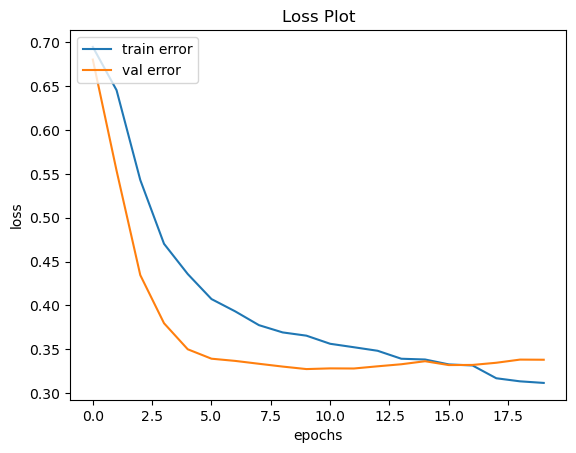

In [9]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']  # 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']  # 검증 데이터 손실값
acc = history_dict['accuracy']      # 정확도
epochs = range(1, len(acc) + 1)     # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

### 드롭아웃 미적용 + 조기종료

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 입력 레이어 정의
inputs = tf.keras.Input(shape=(1000,))  # 입력 데이터의 특성 수

# Dense 레이어 체인
x = tf.keras.layers.Dense(16, activation='relu')(inputs)  # 첫 번째 Dense 레이어
x = tf.keras.layers.Dense(16, activation='relu')(x)       # 두 번째 Dense 레이어

# 출력 레이어
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 생성
model = tf.keras.Model(inputs=inputs, outputs=outputs)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_6 (Dense)             (None, 16)                16016     
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    callbacks=[es, mc],
                    batch_size=512,
                    validation_data=(test_data,test_labels),
                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5794 - accuracy: 0.6970 - val_loss: 0.4158 - val_accuracy: 0.8250 - 604ms/epoch - 12ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3584 - accuracy: 0.8482 - val_loss: 0.3390 - val_accuracy: 0.8575 - 148ms/epoch - 3ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3175 - accuracy: 0.8700 - val_loss: 0.3282 - val_accuracy: 0.8615 - 138ms/epoch - 3ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3061 - accuracy: 0.8749 - val_loss: 0.3308 - val_accuracy: 0.8597 - 133ms/epoch - 3ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3021 - accuracy: 0.8755 - val_loss: 0.3286 - val_accuracy: 0.8601 - 131ms/epoch - 3ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2968 - accuracy: 0.8782 - val_loss: 0.3296 - val_accuracy: 0.8601 - 139ms/epoch - 3ms/step
Epoch 7/20
49/49 - 0s - loss: 0.2947 - accuracy: 0.8778 - val_loss: 0.3326 - val_accuracy: 0.8580 - 149ms/epoch - 3ms/step
Epoch 7: early stopping


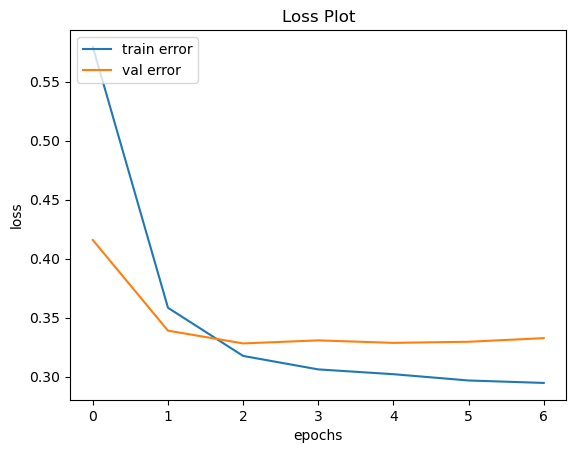

In [13]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']  # 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']  # 검증 데이터 손실값
acc = history_dict['accuracy']      # 정확도
epochs = range(1, len(acc) + 1)     # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

### 드롭아웃 적용 + 조기종료

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 입력 레이어 정의
inputs = tf.keras.Input(shape=(1000,))  # 입력 데이터의 특성 수

# Dense 레이어 체인
x = tf.keras.layers.Dense(16, activation='relu')(inputs)  # 첫 번째 Dense 레이어
x = tf.keras.layers.Dropout(0.5)(x)  # 드롭아웃 추가, 50% 뉴런을 비활성화
x = tf.keras.layers.Dense(16, activation='relu')(x)       # 두 번째 Dense 레이어
x = tf.keras.layers.Dropout(0.5)(x)  # 드롭아웃 추가, 50% 뉴런을 비활성화

# 출력 레이어
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# 모델 생성
model = tf.keras.Model(inputs=inputs, outputs=outputs)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_12 (Dense)            (None, 16)                16016     
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable

In [17]:
# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    callbacks=[es, mc],
                    batch_size=512,
                    validation_data=(test_data,test_labels),
                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6721 - accuracy: 0.5716 - val_loss: 0.6021 - val_accuracy: 0.7750 - 641ms/epoch - 13ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5788 - accuracy: 0.7067 - val_loss: 0.4754 - val_accuracy: 0.8317 - 170ms/epoch - 3ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4958 - accuracy: 0.7802 - val_loss: 0.3989 - val_accuracy: 0.8466 - 173ms/epoch - 4ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4422 - accuracy: 0.8132 - val_loss: 0.3610 - val_accuracy: 0.8534 - 161ms/epoch - 3ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4111 - accuracy: 0.8339 - val_loss: 0.3404 - val_accuracy: 0.8570 - 178ms/epoch - 4ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3871 - accuracy: 0.8444 - val_loss: 0.3293 - val_accuracy: 0.8597 - 159ms/epoch - 3ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3708 - accuracy: 0.8505 - val_loss: 0.3233 - val_accuracy: 0.8612 - 171ms/epoch - 3ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3614 - accuracy: 0.8570 - val_loss: 0.3219 - val_accuracy: 0.8602 - 154ms/epoch - 3ms/step
Epoch 9/20
49/4

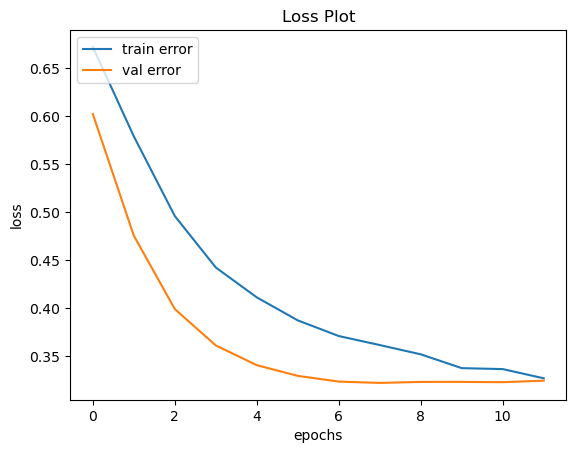

In [18]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']  # 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']  # 검증 데이터 손실값
acc = history_dict['accuracy']      # 정확도
epochs = range(1, len(acc) + 1)     # 에포크 수

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

### 성능 비교 

드롭아웃 + 조기종료 > 드롭아웃 > 조기종료 > 없음